**Importing Libraries**
* `pandas` is used for data manipulation and analysis.
* `seaborn` is a statistical data visualization library based on `matplotlib`.
* `matplotlib.pyplot` is used for creating static, animated, and interactive visualizations in Python.
* `numpy` is a library for numerical operations in Python (though it's not used directly in this snippet).

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Loading the Data**
* `file_path` specifies the location of the CSV file containing the classifier performance metrics.
* `pd.read_csv(file_path)` reads the CSV file into a DataFrame named `all_metrics`, which holds the performance data of various classifiers.

In [32]:
file_path = '/home/aghasemi/CompBio481/ML_classifiers/classifiers_male_performance.csv'

all_metrics = pd.read_csv(file_path)

**Reshaping the DataFrame for Heatmap Visualization**

* `important_metrics.melt(id_vars='Dataset', var_name='Model', value_name='Accuracy')` reshapes the DataFrame from a wide format to a long format suitable for creating heatmaps.
* The `replace` method in `important_metrics['Model']` standardizes model names for better readability in the heatmap, converting long model names to abbreviations.

In [33]:
# Reshape the DataFrame for heatmap visualization
important_metrics = all_metrics.melt(id_vars='Dataset', var_name='Model', value_name='Accuracy')

important_metrics['Model'] = important_metrics['Model'].replace({
    'Baseline Accuracy': 'Baseline',
    'Logistic Regression': 'LR',
    'Random Forest': 'RF',  # Assuming there might be 'Random Forest' in your actual data
    'SVM': 'SVM',
    'XGBoost': 'XG Boost',
    'Deep Learning': 'DL'  # Adding this to match a common abbreviation
}, regex=True)

**Pivot the DataFrame for heatmap visualization**

* `important_metrics.pivot("Model", "Dataset", "Accuracy")` reshapes the DataFrame to a format where `Model` is on the y-axis, `Dataset` is on the x-axis, and `Accuracy` values are used to fill the heatmap cells.

In [34]:
# Pivot the DataFrame for heatmap visualization
heatmap_data_accuracy = important_metrics.pivot("Model", "Dataset", "Accuracy")

/tmp/ipykernel_30628/3861310204.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_accuracy = important_metrics.pivot("Model", "Dataset", "Accuracy")


**Creating and Customizing the Heatmap**
* `plt.figure(figsize=(12, 6))` sets the size of the heatmap figure.
* `sns.heatmap` creates the heatmap with annotations for accuracy values, a color map (`'RdYlGn'`), and specified formatting.
* `plt.ylabel` and `plt.xlabel` set labels for the y-axis and x-axis with larger font sizes.
* `plt.yticks(rotation=90)` rotates y-axis labels vertically for better readability.
* `colorbar.set_ticks` and `colorbar.set_ticklabels` adjust the color bar to show specific accuracy values.
* `plt.savefig` saves the heatmap figure as a PNG file with high resolution.
* `plt.tight_layout()` adjusts the layout to prevent overlapping elements.
* `plt.show()` displays the heatmap.

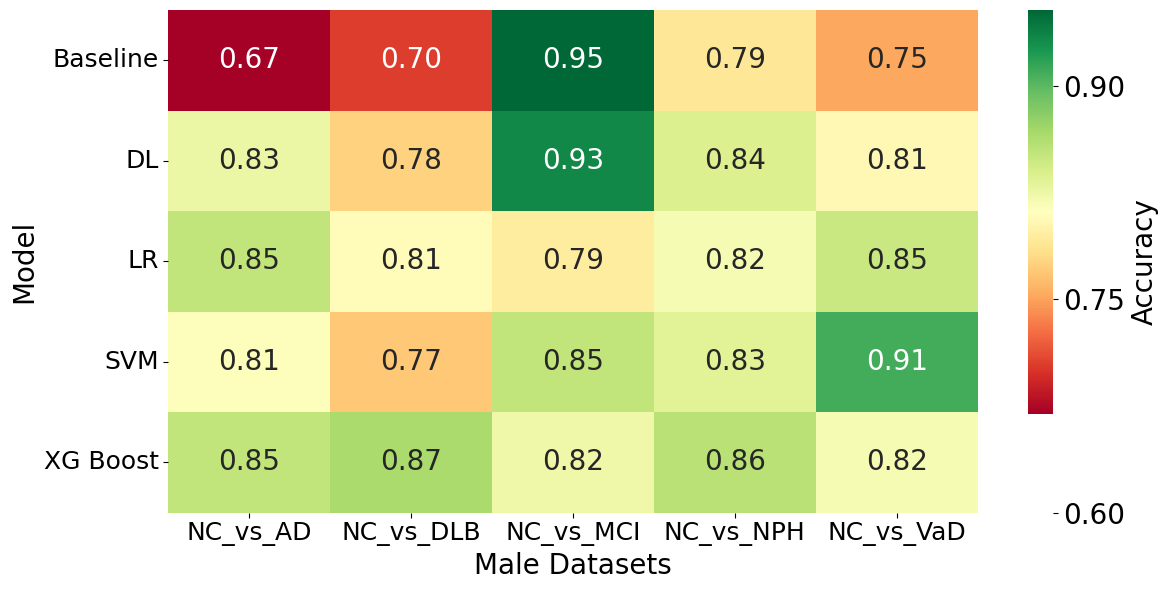

In [35]:
plt.figure(figsize=(12, 6))  # Adjusting the overall size of the heatmap
ax1 = sns.heatmap(heatmap_data_accuracy, annot=True, cmap='RdYlGn', fmt=".2f",
                  cbar_kws={'label': 'Accuracy'}, annot_kws={"size": 20})  # Bigger font size for annotations
plt.ylabel('Model', fontsize=20)
plt.xlabel('Male Datasets', fontsize=20)

# Rotate model names to be vertical
plt.yticks(rotation=90)
plt.xticks()

# Adjusting the color bar to show specific numbers
colorbar = ax1.collections[0].colorbar
colorbar.set_ticks([0.60, 0.75, 0.90])  # Set ticks at specific values
colorbar.set_ticklabels(['0.60', '0.75', '0.90'], fontsize=20)  # Label ticks with the actual values
colorbar.set_label('Accuracy', fontsize=20)  # Set the font size for the color bar label
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, rotation=0)  # Increase font size for y-axis ticks and set rotation to horizontal

# Save the figure for Accuracy with high DPI for better resolution
plt.savefig('/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/male_model_accuracy_heatmap.png', dpi=300, format='png')

plt.tight_layout()
plt.show()